In [4]:
import pandas as pd

In [5]:
import numpy as np

In [88]:
df = pd.read_csv("/content/service_efficiency_analysis_dataset.csv")

In [7]:

print(df)

                name  service_id letter  counter_id waiting_time served_time  \
0     Nandu Acharaya           1      W           2     00:06:45    00:08:01   
1     Nandu Acharaya           2     NR           2     00:00:13         NaN   
2        Prem Jaishi           2     NR           8     00:02:03         NaN   
3     Nandu Acharaya           3      T           3     00:00:29    00:01:02   
4    Mahima Kalikote           1      W           1     00:06:07         NaN   
..               ...         ...    ...         ...          ...         ...   
250   Lokendra Sunar           2     NR           7     01:13:49    00:35:49   
251      Prem Jaishi           2     NR           8     00:20:58    00:11:51   
252      Ajaya Limbu           2     NR           9     00:19:59    00:09:46   
253   Chhiring Ghale           3      T           3     02:43:59    00:09:42   
254         Jyoti BK           3      T           4     02:59:46    00:14:39   

    turn_around_time  visitor  queued  

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255 entries, 0 to 254
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              255 non-null    object 
 1   service_id        255 non-null    int64  
 2   letter            255 non-null    object 
 3   counter_id        255 non-null    int64  
 4   waiting_time      255 non-null    object 
 5   served_time       215 non-null    object 
 6   turn_around_time  215 non-null    object 
 7   visitor           255 non-null    int64  
 8   queued            255 non-null    int64  
 9   called            255 non-null    int64  
 10  serving           255 non-null    int64  
 11  served            252 non-null    float64
 12  no_show           252 non-null    float64
 13  called_date       255 non-null    object 
dtypes: float64(2), int64(6), object(6)
memory usage: 28.0+ KB


In [ ]:
print(df.isnull().sum())

name                 0
service_id           0
letter               0
counter_id           0
waiting_time         0
served_time         40
turn_around_time    40
visitor              0
queued               0
called               0
serving              0
served               3
no_show              3
called_date          0
dtype: int64


In [ ]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
250    False
251    False
252    False
253    False
254    False
Length: 255, dtype: bool

In [ ]:
print(df.duplicated().sum())

0


In [ ]:
df.value_counts()

name          service_id  letter  counter_id  waiting_time  served_time  turn_around_time  visitor  queued  called  serving  served  no_show  called_date
Ajaya Limbu   1           W       9           00:03:26      00:15:34     00:19:00          59       0       59      10       49.0    10.0     2024-02-11     1
Prem Jaishi   2           NR      8           00:16:39      00:17:41     00:34:20          13       0       13      3        10.0    3.0      2024-02-12     1
                                              00:20:58      00:11:51     00:32:49          25       0       25      5        20.0    5.0      2024-02-16     1
                                              00:27:27      00:10:03     00:37:30          28       0       28      2        26.0    2.0      2024-01-31     1
                                              00:52:11      00:14:01     01:06:12          25       0       25      2        23.0    1.0      2024-02-13     1
                                                   

In [ ]:
df.nunique()

name                 13
service_id            3
letter                3
counter_id           10
waiting_time        252
served_time         205
turn_around_time    214
visitor              47
queued                1
called               47
serving              17
served               41
no_show              17
called_date          20
dtype: int64

In [11]:
import statistics

In [12]:
df['New waiting_time'] = pd.to_timedelta(df['waiting_time'])
df1 = df.groupby(['service_id'])['New waiting_time'].mean().reset_index(name='waiting_time')
print (df1)

   service_id              waiting_time
0           1 0 days 00:28:49.444444444
1           2 0 days 00:51:11.906976744
2           3 0 days 01:37:35.481481481


In [13]:

df['New served_time'] = pd.to_timedelta(df['served_time'])
df2 = df.groupby(['service_id'])['New served_time'].mean().reset_index(name='served_time')
print (df2)

   service_id               served_time
0           1 0 days 00:11:16.488372093
1           2 0 days 00:19:33.836363636
2           3 0 days 00:22:12.210526315


In [14]:

df['New turn_around_time'] = pd.to_timedelta(df['turn_around_time'])
df3 = df.groupby(['service_id'])['New turn_around_time'].mean().reset_index(name='turn_around_time')
print (df3)

   service_id          turn_around_time
0           1 0 days 00:36:48.906976744
1           2 0 days 01:11:59.809090909
2           3 0 days 01:41:55.157894736


In [15]:
df['New waiting_time'] = pd.to_timedelta(df['waiting_time'])
df1 = df.groupby(['service_id'])['New waiting_time'].median().reset_index(name='waiting_time')
print (df1)

   service_id    waiting_time
0           1 0 days 00:17:29
1           2 0 days 00:28:52
2           3 0 days 01:27:01


In [16]:
df['New served_time'] = pd.to_timedelta(df['served_time'])
df2 = df.groupby(['service_id'])['New served_time'].median().reset_index(name='served_time')
print (df2)

   service_id     served_time
0           1 0 days 00:06:33
1           2 0 days 00:13:40
2           3 0 days 00:13:36


In [17]:

df['New turn_around_time'] = pd.to_timedelta(df['turn_around_time'])
df3 = df.groupby(['service_id'])['New turn_around_time'].median().reset_index(name='turn_around_time')
print (df3)

   service_id turn_around_time
0           1  0 days 00:22:40
1           2  0 days 00:43:34
2           3  0 days 01:03:29


In [18]:
df['New waiting_time'] = pd.to_timedelta(df['waiting_time'])
df1 = df.groupby(['service_id'])['New waiting_time'].std().reset_index(name='waiting_time')
print (df1)

   service_id              waiting_time
0           1 0 days 00:31:28.406704628
1           2 0 days 00:50:43.808208996
2           3 0 days 01:03:17.438695209


In [19]:
df['New served_time'] = pd.to_timedelta(df['served_time'])
df2 = df.groupby(['service_id'])['New served_time'].std().reset_index(name='served_time')
print (df2)

   service_id               served_time
0           1 0 days 00:18:12.264304840
1           2 0 days 00:20:51.797940192
2           3 0 days 00:33:33.000512748


In [20]:

df['New turn_around_time'] = pd.to_timedelta(df['turn_around_time'])
df3 = df.groupby(['service_id'])['New turn_around_time'].std().reset_index(name='turn_around_time')
print (df3)

   service_id          turn_around_time
0           1 0 days 00:33:18.021860728
1           2 0 days 00:51:33.563618596
2           3 0 days 00:59:04.681105593


In [21]:
updated_df = df
updated_df['served_time']=pd.to_timedelta(df['served_time'])
updated_df['served_time']=updated_df['served_time'].fillna(updated_df['served_time'].mean())
updated_df['turn_around_time']=pd.to_timedelta(df['turn_around_time'])
updated_df['turn_around_time']=updated_df['turn_around_time'].fillna(updated_df['turn_around_time'].mean())

updated_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255 entries, 0 to 254
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype          
---  ------                --------------  -----          
 0   name                  255 non-null    object         
 1   service_id            255 non-null    int64          
 2   letter                255 non-null    object         
 3   counter_id            255 non-null    int64          
 4   waiting_time          255 non-null    timedelta64[ns]
 5   served_time           255 non-null    timedelta64[ns]
 6   turn_around_time      255 non-null    timedelta64[ns]
 7   visitor               255 non-null    int64          
 8   queued                255 non-null    int64          
 9   called                255 non-null    int64          
 10  serving               255 non-null    int64          
 11  served                252 non-null    float64        
 12  no_show               252 non-null    float64        
 13  calle

In [22]:
print(updated_df.isnull().sum())

name                     0
service_id               0
letter                   0
counter_id               0
waiting_time             0
served_time              0
turn_around_time         0
visitor                  0
queued                   0
called                   0
serving                  0
served                   3
no_show                  3
called_date              0
New waiting_time         0
New served_time         40
New turn_around_time    40
dtype: int64


In [23]:
df.describe()

,service_id,counter_id,waiting_time,served_time,turn_around_time,visitor,queued,called,serving,served,no_show,New waiting_time,New served_time,New turn_around_time
count,255.000000,255.000000,255,255,255,255.000000,255.0,255.000000,255.000000,252.000000,252.000000,255,215,215
mean,1.717647,5.137255,0 days 00:47:25.447058823,0 days 00:16:28.893023255,0 days 01:00:34.106976744,13.152941,0.0,13.152941,2.419608,10.861111,2.373016,0 days 00:47:25.447058823,0 days 00:16:28.893023255,0 days 01:00:34.106976744
std,0.645001,2.768066,0 days 00:49:59.241969215,0 days 00:19:49.762118980,0 days 00:46:12.189201809,12.305340,0.0,12.305340,3.896345,9.893887,3.927093,0 days 00:49:59.241969215,0 days 00:21:36.194304654,0 days 00:50:20.180082626
min,1.000000,1.000000,0 days 00:00:13,0 days 00:00:03,0 days 00:01:31,1.000000,0.0,1.000000,0.000000,0.000000,0.000000,0 days 00:00:13,0 days 00:00:03,0 days 00:01:31
25%,1.000000,3.000000,0 days 00:10:47.500000,0 days 00:08:37.500000,0 days 00:26:14,4.000000,0.0,4.000000,0.000000,3.750000,0.000000,0 days 00:10:47.500000,0 days 00:07:45,0 days 00:23:55
50%,2.000000,5.000000,0 days 00:28:01,0 days 00:14:03,0 days 00:55:35,10.000000,0.0,10.000000,1.000000,8.000000,1.000000,0 days 00:28:01,0 days 00:12:08,0 days 00:43:17
75%,2.000000,8.000000,0 days 01:07:22.500000,0 days 00:16:29.446511627,0 days 01:08:21.500000,17.500000,0.0,17.500000,3.000000,15.000000,3.000000,0 days 01:07:22.500000,0 days 00:17:29,0 days 01:21:45
max,3.000000,10.000000,0 days 03:52:34,0 days 03:03:44,0 days 03:42:47,73.000000,0.0,73.000000,36.000000,51.000000,36.000000,0 days 03:52:34,0 days 03:03:44,0 days 03:42:47


In [24]:
import matplotlib.pyplot as plt

<Axes: title={'center': 'visitor'}, xlabel='service_id'>

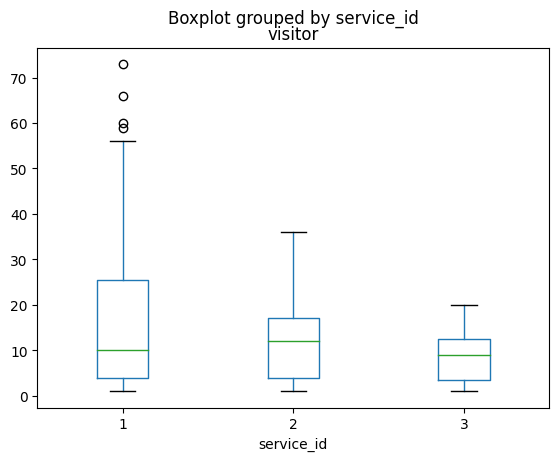

In [25]:
df.boxplot(by ='service_id', column =['visitor'], grid = False)


<Axes: title={'center': 'waiting_time_minutes'}, xlabel='service_id'>

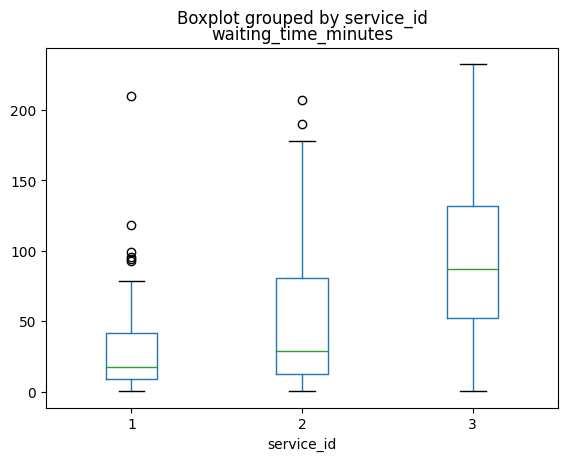

In [26]:
# Convert waiting_time to timedelta
df['waiting_time'] = pd.to_timedelta(df['waiting_time'])

# Convert waiting_time to minutes
df['waiting_time_minutes'] = df['waiting_time'] / pd.Timedelta(minutes=1)

df.boxplot(by ='service_id', column =['waiting_time_minutes'], grid = False)



<Axes: title={'center': 'served_time'}, xlabel='service_id'>

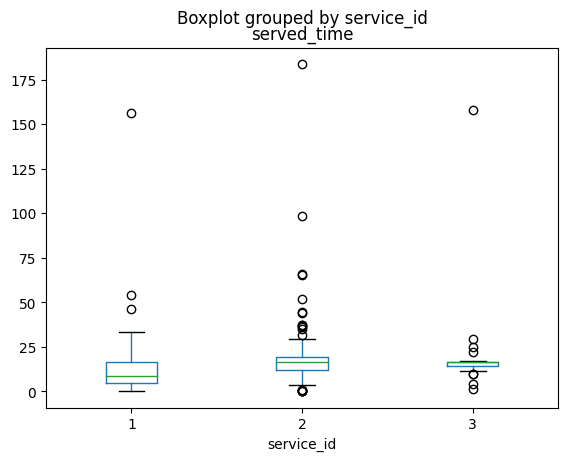

In [27]:
df['served_time'] = pd.to_timedelta(df['served_time'])

df['served_time'] = df['served_time'] / pd.Timedelta(minutes=1)

df.boxplot(by ='service_id', column =['served_time'], grid = False)

<Axes: title={'center': 'turn_around_time'}, xlabel='service_id'>

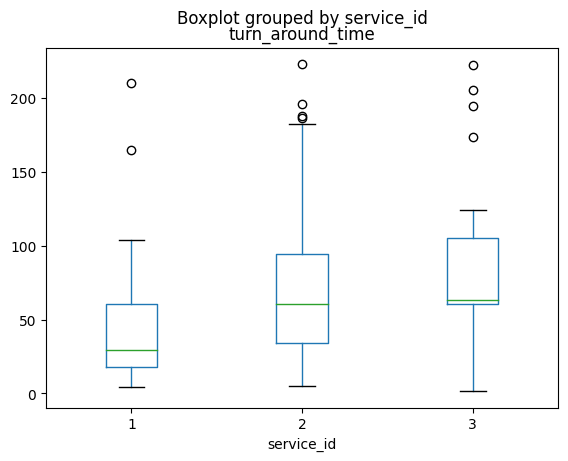

In [28]:
df['turn_around_time'] = pd.to_timedelta(df['turn_around_time'])

df['turn_around_time'] = df['turn_around_time'] / pd.Timedelta(minutes=1)

df.boxplot(by ='service_id', column =['turn_around_time'], grid = False)

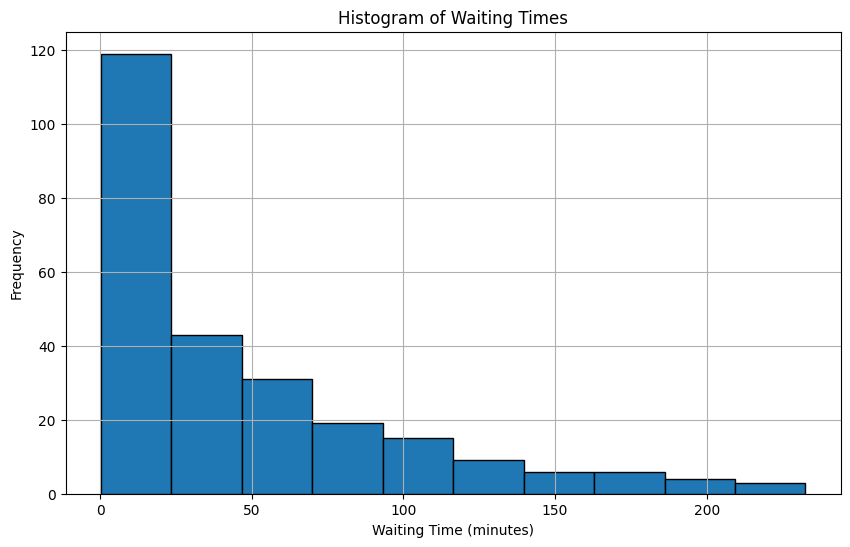

In [29]:
# Convert waiting_time to timedelta
df['waiting_time'] = pd.to_timedelta(df['waiting_time'])

# Convert waiting_time to minutes
df['waiting_time_minutes'] = df['waiting_time'] / pd.Timedelta(minutes=1)

plt.figure(figsize=(10, 6))
plt.hist(df['waiting_time_minutes'], bins=10, edgecolor='black')
plt.title('Histogram of Waiting Times')
plt.xlabel('Waiting Time (minutes)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

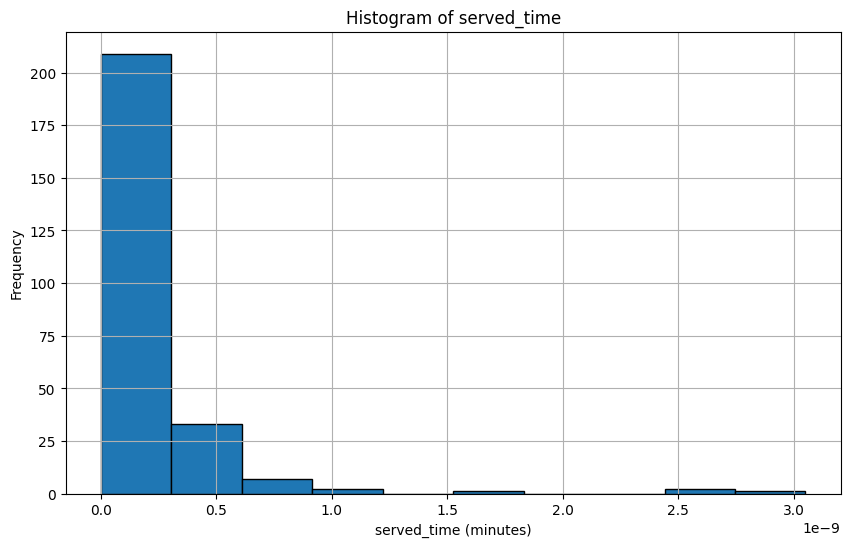

In [30]:
df['served_time'] = pd.to_timedelta(df['served_time'])

df['served_time_minutes'] = df['served_time'] / pd.Timedelta(minutes=1)

plt.figure(figsize=(10, 6))
plt.hist(df['served_time_minutes'], bins=10, edgecolor='black')
plt.title('Histogram of served_time')
plt.xlabel('served_time (minutes)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

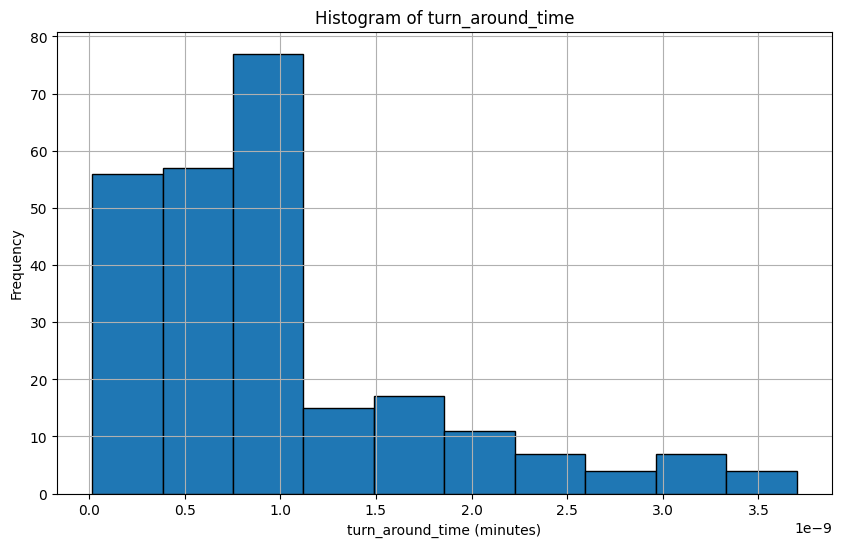

In [31]:
df['turn_around_time'] = pd.to_timedelta(df['turn_around_time'])

df['turn_around_time'] = df['turn_around_time'] / pd.Timedelta(minutes=1)

plt.figure(figsize=(10, 6))
plt.hist(df['turn_around_time'], bins=10, edgecolor='black')
plt.title('Histogram of turn_around_time')
plt.xlabel('turn_around_time (minutes)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

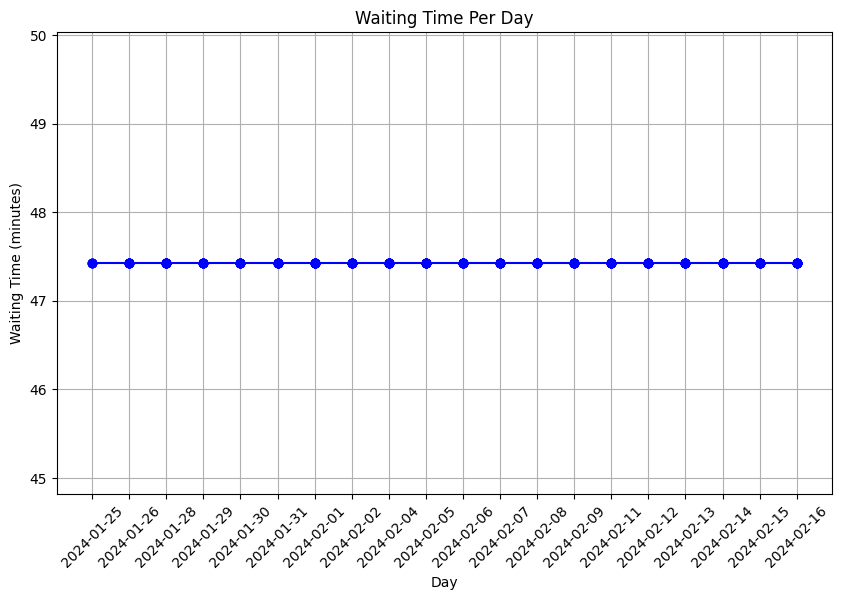

In [32]:
##AVERAGE waiting time per day
# Convert waiting_time to timedelta
df['waiting_time'] = pd.to_timedelta(df['waiting_time'])

# Convert waiting_time to minutes
df['waiting_time_minutes']=df['waiting_time'].mean()

df['waiting_time_minutes'] = df['waiting_time_minutes'] / pd.Timedelta(minutes=1)

plt.figure(figsize=(10, 6))
plt.plot(df['called_date'],df['waiting_time_minutes'], marker='o', linestyle='-', color='b')
plt.title('Waiting Time Per Day')
plt.xlabel('Day')
plt.ylabel('Waiting Time (minutes)')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

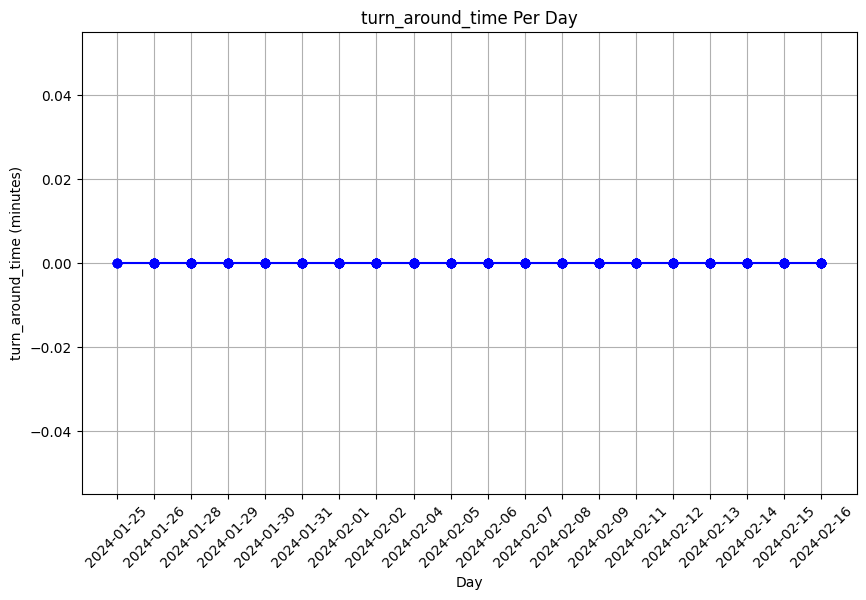

In [33]:
# Convert turn_around_time to timedelta
df['turn_around_time'] = pd.to_timedelta(df['turn_around_time'])

# Convert turn_around_time to minutes
df['turn_around_time']=df['turn_around_time'].mean()

df['turn_around_time'] = df['turn_around_time'] / pd.Timedelta(minutes=1)

plt.figure(figsize=(10, 6))
plt.plot(df['called_date'],df['turn_around_time'], marker='o', linestyle='-', color='b')
plt.title('turn_around_time Per Day')
plt.xlabel('Day')
plt.ylabel('turn_around_time (minutes)')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

In [34]:
#Outlier Detection
Q1 = np. quantile(df['waiting_time'],0.25)
Q2 = np. quantile(df['waiting_time'],0.50)
Q3 = np. quantile(df['waiting_time'],0.75)
print("Q1: ",Q1, "\nQ2: ",Q2,"\nQ3: ",Q3)
IQR = Q3-Q1
print ("Lower_IQR: ", Q1-(1.5*IQR), "\nUpper_IQR: ",Q3-(1.5*IQR))

Q1:  647500000000 nanoseconds 
Q2:  1681000000000 nanoseconds 
Q3:  4042500000000 nanoseconds
Lower_IQR:  -4445000000000 nanoseconds 
Upper_IQR:  -1050000000000 nanoseconds


In [35]:
Q1 = np. quantile(df['served_time'],0.25)
Q2 = np. quantile(df['served_time'],0.50)
Q3 = np. quantile(df['served_time'],0.75)
print("Q1: ",Q1, "\nQ2: ",Q2,"\nQ3: ",Q3)
IQR = Q3-Q1
print ("Lower_IQR: ", Q1-(1.5*IQR), "\nUpper_IQR: ",Q3-(1.5*IQR))

Q1:  8 nanoseconds 
Q2:  14 nanoseconds 
Q3:  16 nanoseconds
Lower_IQR:  -4 nanoseconds 
Upper_IQR:  4 nanoseconds


In [36]:
Q1 = np. quantile(df['turn_around_time'],0.25)
Q2 = np. quantile(df['turn_around_time'],0.50)
Q3 = np. quantile(df['turn_around_time'],0.75)
print("Q1: ",Q1, "\nQ2: ",Q2,"\nQ3: ",Q3)
IQR = Q3-Q1
print ("Lower_IQR: ", Q1-(1.5*IQR), "\nUpper_IQR: ",Q3-(1.5*IQR))

Q1:  0.0 
Q2:  0.0 
Q3:  0.0
Lower_IQR:  0.0 
Upper_IQR:  0.0


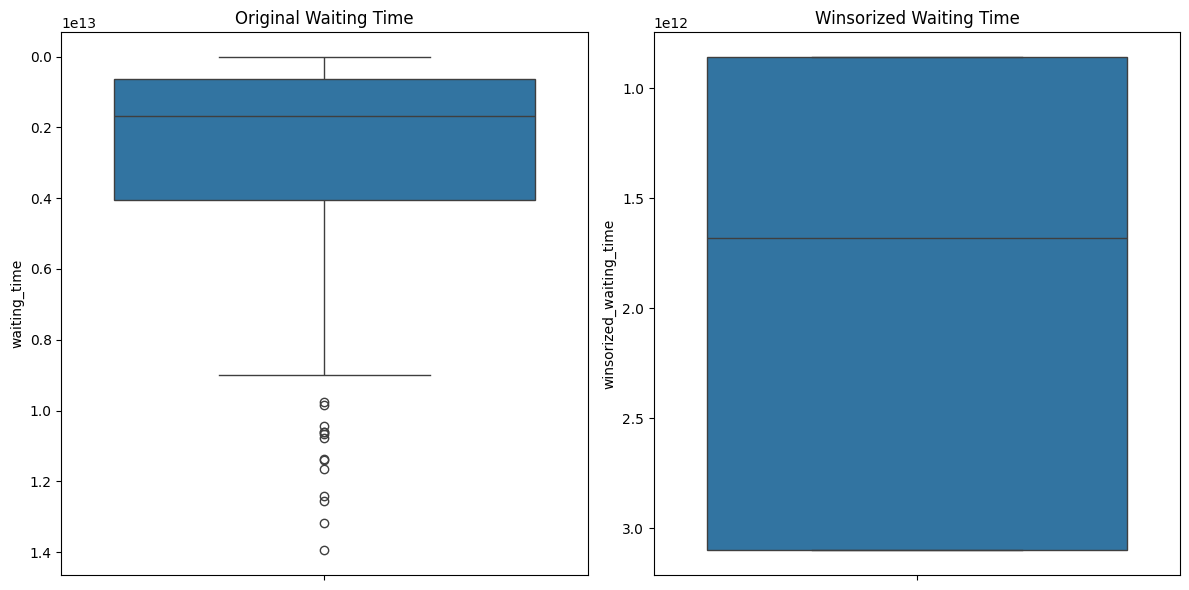

In [37]:
#Handling Outliers using Winsorization
import seaborn as sns

from scipy.stats.mstats import winsorize
a = np.array (df['waiting_time'])
winsorized_a = winsorize(a, limits=[0.32, 0.32])


df['winsorized_waiting_time'] = winsorized_a


plt.figure(figsize=(12, 6))

# Plot for original data
plt.subplot(1, 2, 1)
sns.boxplot(df['waiting_time'])
plt.title('Original Waiting Time')

# Plot for Winsorized data
plt.subplot(1, 2, 2)
sns.boxplot(df['winsorized_waiting_time'])
plt.title('Winsorized Waiting Time')

plt.tight_layout()
plt.show()


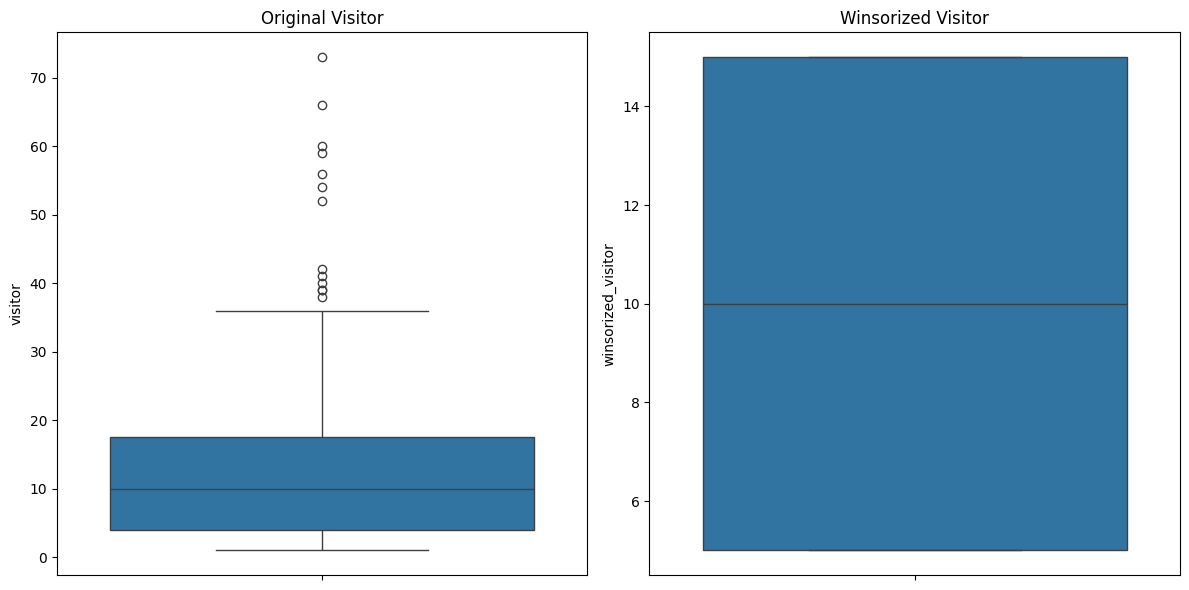

In [38]:
import seaborn as sns

from scipy.stats.mstats import winsorize
a = np.array (df['visitor'])
winsorized_a = winsorize(a, limits=[0.32, 0.32])


df['winsorized_visitor'] = winsorized_a


plt.figure(figsize=(12, 6))

# Plot for original data
plt.subplot(1, 2, 1)
sns.boxplot(df['visitor'])
plt.title('Original Visitor')

# Plot for Winsorized data
plt.subplot(1, 2, 2)
sns.boxplot(df['winsorized_visitor'])
plt.title('Winsorized Visitor')

plt.tight_layout()
plt.show()


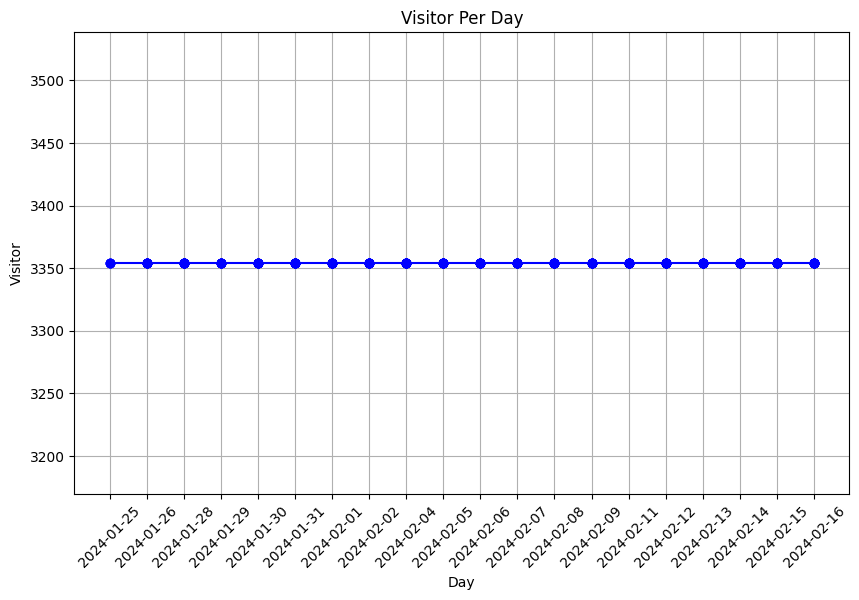

In [39]:
##Total visitor/customers served per day

df['visitor']=df['visitor'].sum()


plt.figure(figsize=(10, 6))
plt.plot(df['called_date'],df['visitor'], marker='o', linestyle='-', color='b')
plt.title('Visitor Per Day')
plt.xlabel('Day')
plt.ylabel('Visitor')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

In [65]:
# Converting waiting time and served time into timedelta
df['waiting_time'] = pd.to_timedelta(df['waiting_time'])
df['served_time'] = pd.to_timedelta(df['served_time'])



## Pearson's Correlation Coefficient

correlation = df['waiting_time'].corr(df['served_time'])
print(f'Pearson correlation coefficient: {correlation}')


## Hence, there is a negative correlation with the value of Pearson's correlation coefficient being -0.15508397.
## This refers to a weak correlation between the waiting_time and served_time.
## When one variable changes, the other variable changes in the opposite direction.
#The higher the waiting time, the lower would be the served time.

Pearson correlation coefficient: -0.155083947691575


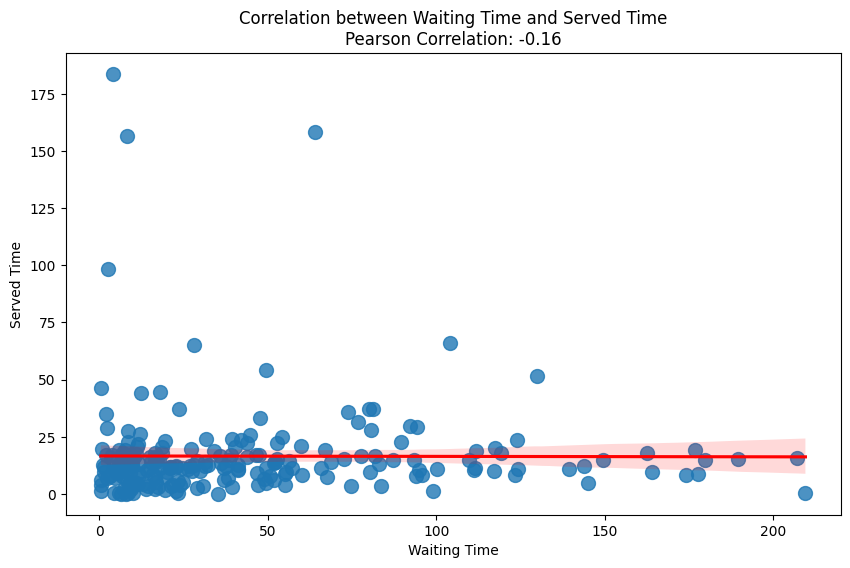

In [66]:


## Converting time into minutes

df['waiting_time'] = df['waiting_time'] / pd.Timedelta(minutes=1)
df['served_time'] = df['served_time'] / pd.Timedelta(minutes=1)


# Create the scatter plot with a regression line
plt.figure(figsize=(10, 6))
sns.regplot(x='waiting_time', y='served_time', data=df, scatter_kws={'s':100}, line_kws={'color':'red'})

# Add titles and labels
plt.title(f'Correlation between Waiting Time and Served Time\nPearson Correlation: {correlation:.2f}')
plt.xlabel('Waiting Time')
plt.ylabel('Served Time')

# Show the plot
plt.show()


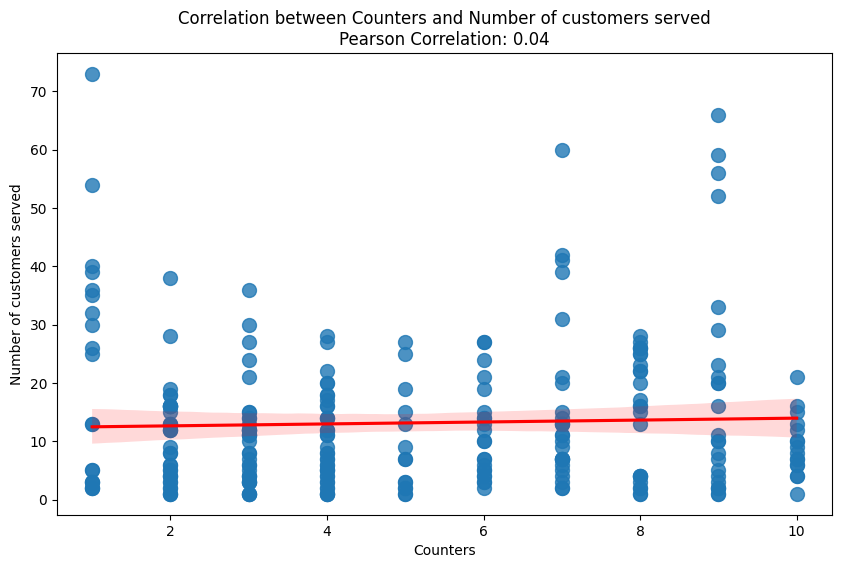

In [82]:
correlation2 = df['counter_id'].corr(df['visitor'])

# Create the scatter plot with a regression line
plt.figure(figsize=(10, 6))
sns.regplot(x='counter_id', y='visitor', data=df, scatter_kws={'s':100}, line_kws={'color':'red'})

# Add titles and labels
plt.title(f'Correlation between Counters and Number of customers served\nPearson Correlation: {correlation2:.2f}')
plt.xlabel('Counters')
plt.ylabel('Number of customers served')

# Show the plot
plt.show()


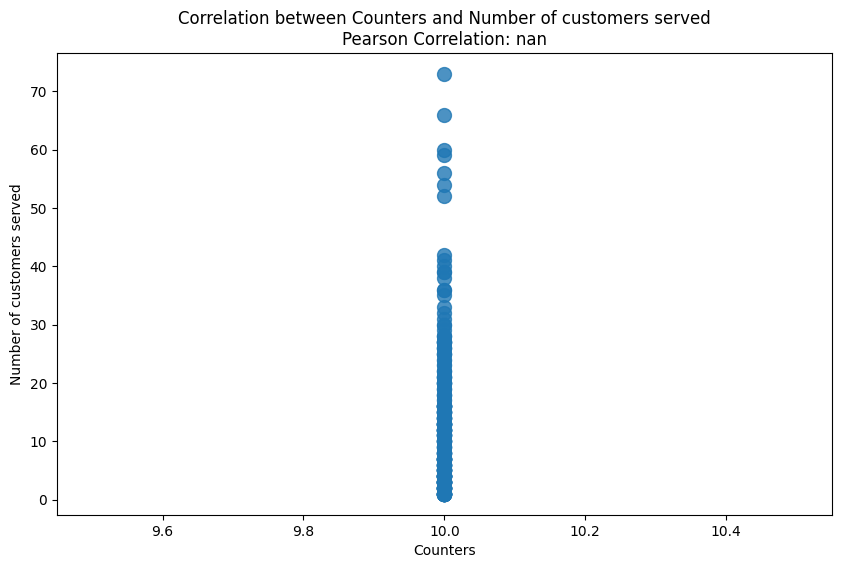

In [101]:
# Calculate the sum of all values in the 'visitor' column
df['sum_visitors'] = df['visitor'].sum(axis=0)

# Calculate the count of distinct values in the 'counter_id' column
df['sum_counters'] = df['counter_id'].nunique()

correlation2 = df['sum_counters'].corr(df['sum_visitors'])

# Create the scatter plot with a regression line
plt.figure(figsize=(10, 6))
sns.regplot(x='sum_counters', y='visitor', data=df, scatter_kws={'s':100}, line_kws={'color':'red'})

# Add titles and labels
plt.title(f'Correlation between Counters and Number of customers served\nPearson Correlation: {correlation2:.2f}')
plt.xlabel('Counters')
plt.ylabel('Number of customers served')



# Show the plot
plt.show()